In [24]:
from jax import random
from jax import numpy as jnp
from craftax import craftax_env
import gymnax
import numpy as np
from PIL import Image
from tqdm import tqdm

In [2]:
gymnax.environments

<module 'gymnax.environments' from '/opt/homebrew/Caskroom/miniforge/base/envs/rl/lib/python3.9/site-packages/gymnax/environments/__init__.py'>

# Full Env

In [3]:
env = craftax_env.make_craftax_env_from_params(classic=False, symbolic=False, auto_reset=True)

Loading Craftax textures from cache.
Textures successfully loaded from cache.


In [4]:
env.static_env_params

StaticEnvParams(map_size=(48, 48), num_levels=9, max_melee_mobs=3, max_passive_mobs=3, max_growing_plants=10, max_ranged_mobs=2, max_mob_projectiles=3, max_player_projectiles=3)

In [5]:
key = random.key(0)
key

Array((), dtype=key<fry>) overlaying:
[0 0]

In [6]:
obs_space = env.observation_space(env.static_env_params)
obs_space.shape, obs_space.low, obs_space.high, obs_space.dtype

((110, 130, 3), 0.0, 1.0, jax.numpy.float32)

In [7]:
key, subkey = random.split(key)
obs, state = env.reset(subkey)
obs.shape, state.__dict__.keys()

((130, 110, 3),
 dict_keys(['map', 'item_map', 'mob_map', 'light_map', 'down_ladders', 'up_ladders', 'chests_opened', 'monsters_killed', 'player_position', 'player_level', 'player_direction', 'player_health', 'player_food', 'player_drink', 'player_energy', 'player_mana', 'is_sleeping', 'is_resting', 'player_recover', 'player_hunger', 'player_thirst', 'player_fatigue', 'player_recover_mana', 'player_xp', 'player_dexterity', 'player_strength', 'player_intelligence', 'inventory', 'melee_mobs', 'passive_mobs', 'ranged_mobs', 'mob_projectiles', 'mob_projectile_directions', 'player_projectiles', 'player_projectile_directions', 'growing_plants_positions', 'growing_plants_age', 'growing_plants_mask', 'potion_mapping', 'learned_spells', 'sword_enchantment', 'bow_enchantment', 'armour_enchantments', 'boss_progress', 'boss_timesteps_to_spawn_this_round', 'light_level', 'achievements', 'state_rng', 'timestep', 'fractal_noise_angles']))

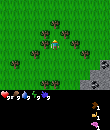

In [8]:
Image.fromarray((np.asarray(obs) * 255).astype(np.uint8))

In [9]:
action_space = env.action_space()
action_space.shape, action_space.n

((), 43)

In [10]:
key, subkey = random.split(key)
action = action_space.sample(subkey)
action

/opt/homebrew/Caskroom/miniforge/base/envs/rl/lib/python3.9/site-packages/jax/_src/numpy/array_methods.py:68: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype, copy=copy, device=device)


Array(32, dtype=int32)

In [11]:
key, subkey = random.split(key)
obs_next, state_next, reward, done, info = env.step(subkey, state, action)
obs_next.shape, reward, done, info

((130, 110, 3),
 Array(0., dtype=float32),
 Array(False, dtype=bool),
 {'Achievements/cast_fireball': Array(0., dtype=float32, weak_type=True),
  'Achievements/cast_iceball': Array(0., dtype=float32, weak_type=True),
  'Achievements/collect_coal': Array(0., dtype=float32, weak_type=True),
  'Achievements/collect_diamond': Array(0., dtype=float32, weak_type=True),
  'Achievements/collect_drink': Array(0., dtype=float32, weak_type=True),
  'Achievements/collect_iron': Array(0., dtype=float32, weak_type=True),
  'Achievements/collect_ruby': Array(0., dtype=float32, weak_type=True),
  'Achievements/collect_sapling': Array(0., dtype=float32, weak_type=True),
  'Achievements/collect_sapphire': Array(0., dtype=float32, weak_type=True),
  'Achievements/collect_stone': Array(0., dtype=float32, weak_type=True),
  'Achievements/collect_wood': Array(0., dtype=float32, weak_type=True),
  'Achievements/damage_necromancer': Array(0., dtype=float32, weak_type=True),
  'Achievements/defeat_archer': Arr

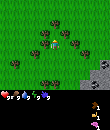

In [12]:
Image.fromarray((np.array(obs_next) * 255).astype(np.uint8))

In [13]:
observations = []
actions = []
max_steps = 100
key = random.key(0)
key, subkey = random.split(key)
obs, state = env.reset(subkey)
for step in tqdm(range(max_steps)):
    key, *subkeys = random.split(key, 3)
    action = action_space.sample(subkeys[0])
    obs, state, reward, done, info = env.step(subkeys[1], state, action)
    if done:
        break
    observations.append(obs)
    actions.append(action)

  0%|          | 0/100 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniforge/base/envs/rl/lib/python3.9/site-packages/jax/_src/numpy/array_methods.py:68: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype, copy=copy, device=device)
/opt/homebrew/Caskroom/miniforge/base/envs/rl/lib/python3.9/site-packages/jax/_src/numpy/array_methods.py:68: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype, c

In [14]:
from moviepy.editor import ImageSequenceClip

def save_video(video, path, fps):
    images = [im for im in video]
    clip = ImageSequenceClip(images, fps=fps)
    clip.write_videofile(path)

In [15]:
observations = [np.array((obs * 255).astype(np.uint8)) for obs in observations]

In [16]:
save_video(observations, "/Users/akhildevarashetti/code/reward_lab/evo_devo_nano/craftax.mp4", 30)

Moviepy - Building video /Users/akhildevarashetti/code/reward_lab/evo_devo_nano/craftax.mp4.
Moviepy - Writing video /Users/akhildevarashetti/code/reward_lab/evo_devo_nano/craftax.mp4



Moviepy - Done !
Moviepy - video ready /Users/akhildevarashetti/code/reward_lab/evo_devo_nano/craftax.mp4


In [17]:
actions

[Array(17, dtype=int32),
 Array(37, dtype=int32),
 Array(0, dtype=int32),
 Array(32, dtype=int32),
 Array(34, dtype=int32),
 Array(4, dtype=int32),
 Array(20, dtype=int32),
 Array(1, dtype=int32),
 Array(3, dtype=int32),
 Array(2, dtype=int32),
 Array(30, dtype=int32),
 Array(11, dtype=int32),
 Array(14, dtype=int32),
 Array(9, dtype=int32),
 Array(35, dtype=int32),
 Array(26, dtype=int32),
 Array(23, dtype=int32),
 Array(0, dtype=int32),
 Array(25, dtype=int32),
 Array(11, dtype=int32),
 Array(30, dtype=int32),
 Array(7, dtype=int32),
 Array(41, dtype=int32),
 Array(33, dtype=int32),
 Array(10, dtype=int32),
 Array(15, dtype=int32),
 Array(4, dtype=int32),
 Array(39, dtype=int32),
 Array(11, dtype=int32),
 Array(2, dtype=int32),
 Array(18, dtype=int32),
 Array(11, dtype=int32),
 Array(13, dtype=int32),
 Array(12, dtype=int32),
 Array(2, dtype=int32),
 Array(0, dtype=int32),
 Array(18, dtype=int32),
 Array(38, dtype=int32),
 Array(27, dtype=int32),
 Array(19, dtype=int32),
 Array(2, dt

# Symbolic Env

In [18]:
env = craftax_env.make_craftax_env_from_params(classic=False, symbolic=True, auto_reset=False)
env.static_env_params

StaticEnvParams(map_size=(48, 48), num_levels=9, max_melee_mobs=3, max_passive_mobs=3, max_growing_plants=10, max_ranged_mobs=2, max_mob_projectiles=3, max_player_projectiles=3)

In [21]:
action_space = env.action_space()
obs_space = env.observation_space(env.static_env_params)

action_space.shape, action_space.n, obs_space.shape, obs_space.low, obs_space.high, obs_space.dtype

((), 43, (8268,), 0.0, 1.0, jax.numpy.float32)

In [22]:
key, subkey = random.split(key)
obs, state = env.reset(subkey)
obs

Array([0., 0., 1., ..., 0., 1., 0.], dtype=float32)

In [28]:
jnp.unique_values(obs)

Array([0.       , 0.1      , 0.7969252, 0.9      , 1.       ], dtype=float32)

# Classic Env

In [30]:
env = craftax_env.make_craftax_env_from_params(classic=True, symbolic=False, auto_reset=False)
env.static_env_params

Processing Craftax-Classic textures. This will take a minute but will be cached for future use.
Textures loaded and saved to cache.


StaticEnvParams(map_size=(64, 64), max_zombies=3, max_cows=3, max_growing_plants=10, max_skeletons=2, max_arrows=3)

In [31]:
action_space = env.action_space()
obs_space = env.observation_space(env.static_env_params)

action_space.shape, action_space.n, obs_space.shape, obs_space.low, obs_space.high, obs_space.dtype

((), 17, (63, 63, 3), 0.0, 1.0, jax.numpy.float32)

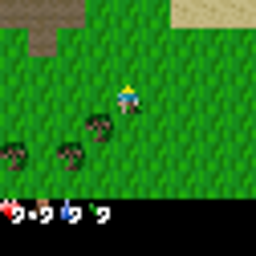

In [35]:
key, subkey = random.split(key)
obs, state = env.reset(subkey)
Image.fromarray((np.asarray(obs) * 255).astype(np.uint8)).resize((256, 256))

# Classic Symbolic Env

In [37]:
env = craftax_env.make_craftax_env_from_params(classic=True, symbolic=True, auto_reset=False)
env.static_env_params

StaticEnvParams(map_size=(64, 64), max_zombies=3, max_cows=3, max_growing_plants=10, max_skeletons=2, max_arrows=3)

In [38]:
action_space = env.action_space()
obs_space = env.observation_space(env.static_env_params)

action_space.shape, action_space.n, obs_space.shape, obs_space.low, obs_space.high, obs_space.dtype

((), 17, (1345,), 0.0, 1.0, jax.numpy.float32)

In [39]:
key, subkey = random.split(key)
obs, state = env.reset(subkey)
obs

Array([0.       , 0.       , 1.       , ..., 0.       , 0.7969252,
       0.       ], dtype=float32)